# Chapter 4 Training Models
**Ways to train a linear regression model, one of the simplest models there is.**<br>
* **using a direct "closed-form" equation that directly computes the model parameters that best fit the model to the training set.**
* **Using an iterative optimization approach called Graideint Descent(GD) that gradually tweaks the model parameters to minimize the cost function over the training set, eventually coverging to the same set of parameters as the first method**

**Polynomial regression: Has more parameters than Linear Regression, more prone to overfitting the training data, can detect overfitting using learning curves**

**Regularization techniques that can reduce the risk of overfitting the training set**

**Classification tasks: Logistic Regression, and Softmax Regression**

## Linear Regression
* **Linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the *bias term*(also called the *intercept term)***
* **To train a Linear Regression model, we need to find the value of the parameter vector that minimize the RMSE**

In [96]:
import numpy as np

In [97]:
X=2*np.random.randn(100,1)

In [98]:
y=4+3*X+np.random.randn(100,1)

**Compute the vecotor parameter that minimizes the RMSE**

In [99]:
X_b=np.c_[np.ones((100,1)),X] #add x0=1 to each instance

**Use the dot method for matrix multiplication and the function from NumPy's linear algebra module** (np.linalg) **to compute the inverse inverse of a matrix, and the** dot( ) **method for matrix multiplication**

In [100]:
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)#based on the normal equation

In [101]:
theta_best

array([[3.84094331],
       [3.00617965]])

**Make predictions using the parameter vector**

In [8]:
X_new=np.array([[0],[2]])

In [102]:
X_new_b=np.c_[np.ones((2,1)),X_new]#add x0=1 to each instance

In [103]:
y_predict=X_new_b.dot(theta_best)

In [104]:
y_predict

array([[3.84094331],
       [9.85330261]])

**Plot the model's predictions**

In [105]:
import matplotlib.pyplot as plt

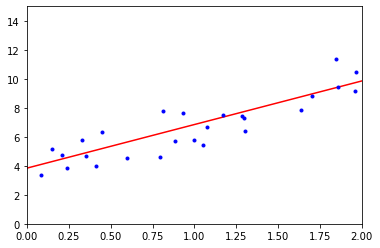

In [106]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

**Performing Linear Regression using SK-Learn**

In [107]:
from sklearn.linear_model import LinearRegression

In [108]:
lin_reg=LinearRegression()

In [109]:
lin_reg.fit(X,y)

LinearRegression()

In [110]:
lin_reg.intercept_,lin_reg.coef_

(array([3.84094331]), array([[3.00617965]]))

In [111]:
lin_reg.predict(X_new)

array([[3.84094331],
       [9.85330261]])

**The** LinearRegression **class is based on the** scipy.linalg.lstsq( ) **function(the name stands for "least squares")**

In [112]:
theta_best_svd,residuals,rank,s=np.linalg.lstsq(X_b,y,rcond=1e-6)

In [113]:
theta_best_svd

array([[3.84094331],
       [3.00617965]])

**Compute the *pseuoinverse* of X(specifically, the Moore-Penrose inverse.) You can use** np.linalg.pinv( ) **to compute the pseudoinverse directly**<br>
**Singular Value Decomposition(SVD): Pseudoinverse is computed using a standard matrix factorization technique SVD that can decompose the training set matrix X into the matrix multiplication of three matrices**
**This approach is more efficient than computing the Normal Equation, plus it handles the edge cases nicely**<br>
**The normal equation may not work if the matrix is not invertible**

In [114]:
np.linalg.pinv(X_b).dot(y)

array([[3.84094331],
       [3.00617965]])

## Computation Complexity
* **The *computation complexity* of inverting a matrix is typically about O(n2.4) to O(n3)**
* **The SVD approach using SK-Learn's** LinearRegression **class is typically about O(n2)**
* **Once the Linear Regression model is trained, predictions are very fast: the computational complexity is linear with regard to both the number of instances to make predictions and the number of features**

## Gradient Descent
* **The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize the cost function**
* **Measures the local gradient of error function with regard to the parameter vector theta, and it goes in the direction of the descending gradient**
* **Start by filling theta with random values(called random initialization). Then you improve it gradually, taking one step at a time, each step attempting to decrease the cost function MSE, until the algorithm *converges* to a minimum**
* **An important parameter in Gradient Descent is the size of the steps, determined by the *learning rate* hyperparameter. If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time**
* **If the learning rate is too high, you might jump across the valley and end up on the other side, possibly even higher than before(might make the algorithm diverge**

**Challenges of Gradient Descent**<br>
* **If the random initialization starts the algorithm on the left, then it will converge to a *local minimum*, which is not as good as a *global minimum***
* **Of the random initialization starts on the right, if will take a very long time to cross the plateu, may never reach the global minimum.**

**Properties of Gradient Descent**<br>
* **Gradient is guaranteed to approach arbitrarily close to the global minimum**
* **Training a model means searching for a comnination of model parameters that minimizes a cost function**
* **The more parameters a model has, the more dimensions this space has, and the harder the search is**

## Batch Gradient Descent
* ***Partial Derivative:* You need to compute the gradient of the cost function with regard to each model parameter**
* **The gradient vector contains all the partial derivates of the cost function(one for each parameter)**
* **The formula involves calculating over the full training set X, at every step.**
* **Gradient Descent scales well with number of features**
* **Set the number of iterations: id it is too low, you will still be far away from the optimal solution when the algorithm stops; but if it is too high, you will waste time whhile the model parameters do not change anymore**

**A quick implementation of Gradient Descent**

In [115]:
eta=0.1#learning rate
n_iterations=1000
m=100

In [116]:
theta=np.random.randn(2,1)#random initialization

In [117]:
for iteration in range(n_iterations):
    gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta=theta-eta*gradients

In [118]:
theta

array([[3.84094331],
       [3.00617965]])

In [119]:
theta

array([[3.84094331],
       [3.00617965]])

**Convergence Rate：**<br>
**When the cost function is convex and its slope does not change abruptly, Batch Gradient Descent with a fixed learning rate will eventually converge to the optimal solution**<br>
**It can take O(1/e) iterations to reach the optimum within a range of e, depending on the shape of the cost function**

## Stochastic Gradient Descent
* ***Stochastic Grdadient Descent* picks a random instance in the training set at every step and computes the gradients based on that single instance**
* **Working on a single instance at a time majes the algorithm much faster because it has very little data to manipulate at every iteration**
* **It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration**
* **Instead of gently decreasing until it reaches the minimum, the cost function wil bounce up and down, decreasing only on average. Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down.**
* **Randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum**
* ***simulated annealing*: The function that determins the learning rate at each iteration is called the *learning schedule*.**
* **If the learning rate is reduced too quickly, you may get stuck in a local minimum. If the learning rate is reduces too slowly, you may jump around the minimum for a long time and end up with a suboptimal solution**

In [120]:
n_epochs=50

In [121]:
t0,t1=5,50#learning schedule hyperparameter

In [122]:
def learning_schedule(t):
    return t0/(t+t1)

In [123]:
theta=np.random.randn(2,1)#random initialization

**By convention we iterate by rounds of *m* iterations;each round is called an epoch**

In [124]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index=np.random.randint(m)
        xi=X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch*m+i)
        theta=theta-eta*gradients

In [125]:
theta

array([[3.88071945],
       [2.98409929]])

**Since instances are picked randomly, some instances may be picked several times per epoch, whole others may not be picked at all**<br>
**When using Stochastic Gradient Descent, the training instances must be independent and identically distributed(IID) to ensure that the parameters get pulled toward global optimum, on average--shuffle isntances during trainning**

**Using the SGDRegressior class for Stochastic GD with scikit-Learn:**<br>
* **defaults to optimixing the squared error cost function, runs for maximum 1,000 epochs or until the loss drops by less than 0.001 during one epoch**
* **It starts with a learning rate of 0.1(eta0=0.1),using the default learning schedule, does not use any regularization**

In [33]:
from sklearn.linear_model import SGDRegressor

In [34]:
sgd_reg=SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.1)

### Mini-batch Gradient Descent
**At each step, insetad of computing the gradients based on the full training set(as in Batch GD) or based on just one instance(as in Stochastic GD),Mini-batch GD computes the gradients on small random sets of instances called *mini-batches***

## Polynomial Regression
**Add powers of each feature as new features, then train a linear model on this extended set of features**

In [126]:
m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)

In [127]:
from sklearn.preprocessing import PolynomialFeatures

In [128]:
poly_features=PolynomialFeatures(degree=2,include_bias=False)

In [129]:
X_poly=poly_features.fit_transform(X)

In [130]:
X[0]

array([2.07263108])

**X_poly contains the original feature of x plus the square of this feature. Now you can fit a** LinearRegressor **model to extend the trainning data**

In [131]:
X_poly[0]

array([2.07263108, 4.29579959])

In [132]:
lin_reg=LinearRegression()

In [133]:
lin_reg.fit(X_poly,y)

LinearRegression()

In [134]:
lin_reg.intercept_,lin_reg.coef_

(array([1.89728252]), array([[1.1617958 , 0.52840688]]))

**Polynomial Regression is capable of finding relationships bewyeem featues(which is something a plain Linear Regression model cannot do)**<br>

## Learning Curves
**Cross Validation**<br>
**If a model performs well on the training data but generalizes poorly on the cross-validation metrix, then your model is overfitting. If it performs poorly on both, then it is underfitting**
**Learning Curves**<br>
**Plots of the model's performance on the training set and validation set as a function of the training size(or the training iteration)**<br>
**To generate the plots, train the model several times on different sized subset of the training set.**

In [135]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [136]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)         

In [137]:
lin_reg=LinearRegression()

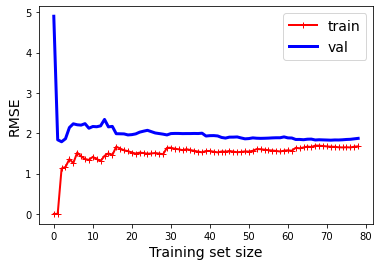

In [138]:
plot_learning_curves(lin_reg,X,y)

**If your model is underfitting the trainning data, adding more trainning examples will not help. You need to use a more complex model or come up with better features**

In [139]:
from sklearn.pipeline import Pipeline

In [140]:
polynomial_regression=Pipeline([
    ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
    ("lin_reg",LinearRegression())
])

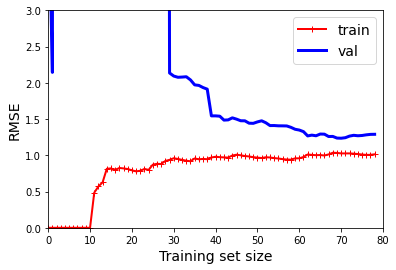

In [141]:
plot_learning_curves(polynomial_regression,X,y)
plt.axis([0, 80, 0, 3])           # not shown
plt.show()                        # not shown

## Regularized Linear Models
**A good way to reduce overfitting is to regularize the model(i.e., to constrain it): the fewer degrees of freedom it has, the harder it will be for it to overfit the data**<br>
**A simple way to regularize a polynomial model is to reduce the number of polynomial degrees**

### Ridge Regression
* **A regularization term us added to the cost function, which forces the learning algorithm to  not only fit the data but also keep the model weights as small as possible**<br>
* **The regularization term should only be added to the cost function during training**<br>
* **Once the model is trained, use the unregularized performance measure to evaluate the model's performance**<br>
* **It is quite common for the cost function used during training to be different from the performance meausre used for testing**<br>
* **It is important to scale the data(e.g., using a StandardScaler) before performing Ridge Regression, as it is sensitive to the scale of the input features. This is true of most regularized models**

**Perform Ridge Regression with Scikit-Learn using a closed-form solution**

In [142]:
from sklearn.linear_model import Ridge

In [143]:
ridge_reg=Ridge(alpha=1,solver="cholesky")

In [144]:
ridge_reg.fit(X,y)

Ridge(alpha=1, solver='cholesky')

In [145]:
ridge_reg.predict([[1.5]])

array([[5.41320986]])

### Lasso Regression
* ***Least Absolute Shrinkage and Selection Operator Regression* is another regularized version of Linear Regression**
* **Just like Ridge Regression, it adds a regularization term to the cost function, but it used the *l1* norm of the weight vector instead of half of the square of the *l2* norm**
* **An important characteristic of Lasso Regression is that it tends to eliminate the weights of the least important features(i.e.,set them to zero)**
* **Lasso Regression automatically performs feature selection and outputs a *sparse model***
* **To avoid Gradient Descent from bouncing around the optimum at the end when using Lasso, you need to gradually reduce the learning rate during training(it will still bounce around the optimum, but the steps will get smaller and smaller, so it will converge)**

In [146]:
from sklearn.linear_model import Lasso

In [147]:
lasso_reg=Lasso(alpha=0.1)

In [148]:
lasso_reg.fit(X,y)

Lasso(alpha=0.1)

In [149]:
lasso_reg.predict([[1.5]])

array([5.36992148])

### Elastic Net
* **Elastic Net is a middle ground between Ridge Regression and Lasso Regression.**
* **The regularization term is a simple mix of both Ridge and Lasso's regularization terms, and you can control the mix ratio r.**
* **When r=0, Elastic Net is equivalent to Ridge Regression, and when r=1, it is equivalent to Lasso Regression**

In [150]:
from sklearn.linear_model import ElasticNet

In [151]:
elastic_net=ElasticNet(alpha=0.1, l1_ratio=0.5)

In [152]:
elastic_net.fit(X,y)

ElasticNet(alpha=0.1)

In [153]:
elastic_net.predict([[1.5]])

array([5.36041167])

### Elastic Net vs. Ridge Regression vs. Lasso Regression
* **Generally, you should avoid Linear Regression**
* **Ridge is a good default**
* **But if you suspect that only a few features are useful, you should prefer Lasso or Elastic Net because they tend to reduce the useless features' weights down to zero**
* **In general, Elastic Net is preferred over Lasso because Lasso may behave erratically when the number of features is greater than the number of trainning instances or when several features are strongly correalted**

### Early Stopping
* **A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum**
* **With Stochastic and Mini-batch Gradient Descent,the curves are not so smooth, and it may be hard to know whether you have reached the minimum or not**
* **One solution is to stop only after the validation error has been above the minimum for some time(when you are confident that the model will not do any better), then roll back the model parameters to the point where the validation error was at minimum**

In [154]:
from sklearn.pipeline import Pipeline
#prepare the data
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("std_scaler",StandardScaler()),
])

In [156]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [157]:
X_train_poly_scaled=poly_scaler.fit_transform(X_train)

In [158]:
X_val_poly_scaled=poly_scaler.transform(X_val)

In [160]:
sgd_reg=SGDRegressor(max_iter=1,tol=-np.infty,warm_start=True,
                    penalty=None,learning_rate="constant",eta0=0.0005)

In [162]:
from copy import deepcopy

In [164]:
minimum_val_error=float("inf")
best_epoch=None
best_model=None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled,y_train)#continue where it left off
    y_val_predict=sgd_reg.predict(X_val_poly_scaled)
    val_error=mean_squared_error(y_val,y_val_predict)
    if val_error<minimum_val_error:
        minimum_val_error=val_error
        best_epoch=epoch
        best_model=deepcopy(sgd_reg)

**With** warm_start=True, **when the** fit( ) **method is called it continues training where it left off, instead of restarting from scratch**

## Logistic Regression
* **Logistic Regression(also called Logit Regression) is commonly used to estimate the probility that an instance belongs to a particular class**
* **If the probability is greater than 50%, then the model predicts that an instance belongs to that class, otherwise it predicts it does not.**

### Estimating Probabilities
**A Logistic Regression model computes a weighted sum of the input features(plus a bias term), but instead of outputting the result directly like the Linear Regression model, it outputs the logistic of this result**

### Training and Cost Function
* **The objective of training is to set the parameter vector theta of the cost fucntion so that the model estimates high probabilities for positive instances(y=1) and low probabilities for negative instances(y=0)**
* **The cost function over the whole training set is the average cost over all training instances**
* **There is no closed-form equation to compute the value of theta that minimizes the cost function**
* **The cost function is convex, so Gradient Descent(or any optimization algorithm) is guaranteed to find the global minimum(if the learning rate is not too large and you wait long enough)**
* **Once you have the gradient vector containing all the partial derivatives, you can use it in the Batch Gradient Descent algorithm**

### Decision Boundaries

In [165]:
from sklearn import datasets
iris=datasets.load_iris()

In [166]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [167]:
X=iris["data"][:,3:]#petal width

In [169]:
y=(iris["target"]==2).astype(np.int)#1 if Iris virginica, else 0

In [170]:
from sklearn.linear_model import LogisticRegression

In [172]:
log_reg=LogisticRegression()

In [173]:
log_reg.fit(X,y)

LogisticRegression()

In [174]:
X_new=np.linspace(0,3,1000).reshape(-1,1)

In [177]:
y_proba=log_reg.predict_proba(X_new)

**There is a *decision boundary* at around 1.6cm where both porbabilites are equal to 50%**

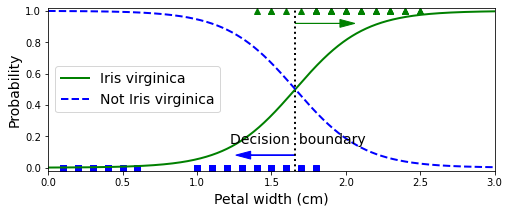

In [181]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [183]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

**Just like other linear models, Logistic Regression models can be regularized using *l1* or *l2* penalties. SK-Learn actually adds an *l2* penalty by default**<br>
**The hyperparameter controlling the regularization strength of a SK-Learn** LogisticRegression **model is not** alpha, **but its inverse:** C **. The higher the value of** C, **the less the model is regularized**

### Sofmax Regression
* **Logistic model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers**<br>
* **When given an instance x, the softmax regression model first computes a score sk(x) for each class k, then estimates the probability of each class by applying the *softmax function(also called normalized exponential)* to the scores**
* **The Softmax Regression classifier predicts the class with the highest estimated probability(which is the class with the highest class)**
* **The Softmax Regression classifer predicts the class with the highest estimated probability(which is simply the class with the highest score)**
* **The Softmax Regression classifier predicts one class at a time, so it should be used with only mutually exclusive classes**

### Cross Entropy
* **Cross entropy is used to measure how well a set of estimates class probabilities mathces the target classes**
* **Calculate the graidient vector for every class, then use GradientDescent(or any other optimization algorithm) to find the parameter matrix theta that minimizes the cost function**

**Applying Softmax Regression**<br>
* **Sk-Learn's** LogisticRegression **used one-versus-the rest by the default when you train it on more than two classes** 
* **You can set the** multi_class **hyperparameter to** "multinomial" **to switch it to Softmax Regression**
* **You must also specify a solver that supports Softmax Regression, such as** "lbfgs" **solver.**
* **It also applies *l2* regularization by defaultm which you can control using the hyperparameter C**

In [184]:
X=iris["data"][:,(2,3)]#petal length, petal width
y=iris["target"]

In [185]:
softmax_reg=LogisticRegression(multi_class="multinomial",solver="lbfgs",C=10)

In [187]:
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

**Predicting an iris with petals that are 5cm long and 2cm wide**

In [188]:
softmax_reg.predict([[5,2]])

array([2])

In [189]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])